# Music Map: NLP

### We are going to connect to the spotify API to get the necessary information, in this case we want the lyrics for some spanish artists

In [5]:
# import spotify libs and pandas for data treatment
import spotiscience
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pandas as pd
import time

In [11]:
#create a dictionary with authorization keys
CREDENTIALS = {}
CREDENTIALS['client_id'] = '7fd9bf02dd024ec99bc894464b61cdbb'
CREDENTIALS['client_secret'] = 'aa38008f00e04afb95594a6ccdfec245'
CREDENTIALS['redirect_url'] = 'https://www.google.com/'
CREDENTIALS['user_id'] = 'roldu'
CREDENTIALS['genius_access_token'] = 'ERGNvJVVRWyYk_tKVLhAEsW7PTOTmgLkDd05369JHrMU4zc_ivTy8CEq3T2nvCbj'

Client_id = '7fd9bf02dd024ec99bc894464b61cdbb'
Client_secret = 'aa38008f00e04afb95594a6ccdfec245'

"""You also can set your credentials id on credentials.py"""
# returns 'downloader class'

'You also can set your credentials id on credentials.py'

In [12]:
#create the client object
sd = spotiscience.SpotiScienceDownloader(credentials=CREDENTIALS)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id =Client_id,client_secret=Client_secret))

In [13]:
# Define fuction to get the lyrics

def get_lyrics(artist):

    # firts of all we get the id
    busqueda_id = sp.search(q=f'artist: {artist}',limit = 1, type='artist')
    id = busqueda_id['artists']['items'][0]['uri']

    # with the id we can get the top tracks
    results = sp.artist_top_tracks(id)
    top_tracks_uris = list()

    # save the uris top tracks in a list
    for track in results['tracks']:
        top_tracks_uris.append(track['uri'])

    ll = list()
    albums_with_no_songs = list()

    # with the top traks uris we recollect the data and save it i a list of lists
    for tracks in top_tracks_uris:
        try:
            song = sd.get_song_features(song_id=tracks)
            lyrics = sd.get_song_lyrics(songname=song['name'],artistname=song['artist'])
            l = list()
            l.append(artist)
            l.append(song['name'])
            l.append(lyrics)
            ll.append(l)
        except AttributeError:
            albums_with_no_songs.append(tracks)


    return ll

In [14]:
# initial artists list that we created with the exact names in spotify 
lista_raperos_sp = ['SFDK','Cecilio G.','Ayax y Prok','Sharif','Rels B','Bejo',
                    'Haze','Lagrimas De Sangre','Pepe : Vizio','Santa Salut',
                    'Mala Rodriguez','Luenco','Delaossa','Bizarrap','Residente','Recycled J','Natos y Waor',
                    'Hard GZ','Nikone','El Jincho','Foyone','Kase.o','Dellafuente','Morad','Cráneo',
                    'Saske','Juancho Marques','Zetazen','C. Tangana','Cruz Cafuné','Matasvandals','Toteking',
                    'Don Patricio','Ivancano','ROSALÍA','Los Chikos del Maiz','Shotta','Rapsusklei',
                    'Ptazeta','Bad Gyal','FERNANDOCOSTA','Yung Beef','Kidd Keo']


In [15]:
lista_df_liricas = list()
error = list()
albums_with_no_songs = list()


# This for loop applies the given function for the lyrics. Due to the API limits, we also included a While loop
# to keep trying as for random moments the API doesn't let us extract the desired information
for i in ['SFDK']:
    result = None
    try:
        while result is None:
            try:
                result = get_lyrics(i)
            except  :
                time.sleep(3)
        lista_df_liricas.append(result)

    except AttributeError:
        albums_with_no_songs.append(i)

Searching for "Agua Pasá" by SFDK...
Done.
Searching for "Cara B" by SFDK...
Done.
Searching for "Un Pobre Con Dinero" by SFDK...
Done.
Searching for "Baobab" by SFDK...
Done.
Searching for "Orgullo Banderillero" by SFDK...
Done.
Searching for "Lucifer" by SFDK...
Done.
Searching for "El liricista en el tejado" by SFDK...
Done.
Searching for "Todo Lo Que Importa" by SFDK...
Done.
Searching for "Pastillitas Chicas" by SFDK...
Done.
Searching for "Blondapetit" by SFDK...
Done.


In [16]:
# Create a dataframe with the lyrics previously requested

data = list()

for i in range(len(lista_df_liricas)):
    for j in range(len(lista_df_liricas[i])):
        data.append(tuple(lista_df_liricas[i][j]))

In [17]:
df = pd.DataFrame(data,columns =['artist','song_name','lyrics'] )

### Once we have the dataframe with artist, song_name and the lyrics we proceed to clean the lyrics removing the non-alphanumeric characters

In [18]:
# we clean it using regular expresions
import re

def limpiar_string(string):
    regex = r"\(.*?\)"  # Remove the special characters 
    string = re.sub(regex, '', string)
    regex2=r"\d|[^\w\s]" # Remove numbers and signs
    string = re.sub(regex2, '', string)
    string = " ".join(string.split()) # Remove blank spaces
    string = string.lower()
    return string

In [19]:
# Apply the function to the dataframe series 
df['lyrics']=df['lyrics'].apply(lambda x: limpiar_string(x))

### Finally we have de full Dataset, ready to preprocess the lyrics

In [20]:
# import for spacy an NLP libs
import spacy
import spacy_spanish_lemmatizer
# string manipulation libs
import string
import nltk
from nltk.corpus import stopwords


In [21]:

# to avoid the lyrics that are not in spanish, we use a file that has all the words in spanish
with open('0_palabras_todas.txt', 'r', encoding='utf-8') as text:
    spanish_words = text.read()
spanish_words = spanish_words.split('\n')

In [22]:
#
lista_song_name = df['song_name'].sum()
lista_song_name = list(set(nltk.word_tokenize(lista_song_name)))

In [23]:
# download the stop words in spanish and remove them , we add three more words than don't have any meaning
palabras_funcionales=nltk.corpus.stopwords.words("spanish")
for i in ['lyrics','embed','lyricsembed']:

    palabras_funcionales.append(i)

In [24]:
palabras_funcionales.extend(lista_song_name)

In [25]:
# Create a new columns with the processed lyrics
lll = list()

for j in range(len(df['lyrics'])):
    lll.append([i for i in nltk.word_tokenize(df['lyrics'][j]) if i in spanish_words if i not in palabras_funcionales if len(i)>3])
df['lyrics_spanish'] = lll

In [26]:
df['lyrics_spanish'] = df['lyrics_spanish'].apply(lambda x:  ' '.join(x))

In [27]:
df

,artist,song_name,lyrics,lyrics_spanish
0,SFDK,Agua Pasá,agua pasá lyrics ahora me levanto de la cama c...,agua pasá ahora levanto cama unas ganas mandar...
1,SFDK,Cara B,cara b lyrics qué complicao es sacarle el bril...,cara brillo detalles sencillo llevar veces esc...
2,SFDK,Un Pobre Con Dinero,un pobre con dinero lyrics vuelvo a tener seis...,pobre dinero vuelvo tener seis edad madre reci...
3,SFDK,Baobab,baobab lyrics creo que fue a causa de una entr...,baobab creo causa entrevista recuerdo dónde ta...
4,SFDK,Orgullo Banderillero,orgullo banderillero lyrics yo todo lo vi pues...,orgullo banderillero puesto vivo cerebro vengo...
5,SFDK,Lucifer,lucifer lyrics saca el peta préndelo por qué n...,lucifer saca peta fumar fuma profesor viendo c...
6,SFDK,El liricista en el tejado,el liricista en el tejado lyricsletra de el li...,tejado tejado ciudad respirando hombre metido ...
7,SFDK,Todo Lo Que Importa,todo lo que importa lyrics solo dime si estoy ...,importa solo igual abandonar espiral tiempo de...
8,SFDK,Pastillitas Chicas,pastillitas chicas lyrics te has quedao loco t...,loco loco perdiendo excepto quiero tocar cielo...
9,SFDK,Blondapetit,blondapetit lyrics me say yo es el chico de fu...,chico fuego triple málaga fumando marihuana go...


In [ ]:
# Remove all the artists that have lyrics in another language or are duplicated

lista_fake = ['Adala','Cartel B.A.E','Cecilia Krull','Central Cee','Costa','Kase.o','Khaled','Kaze','Kream','Mala Rodríguez','Nach','Omega El CTM','Saske','Stigma','Toteking','Trobi','Xmaga','DELLAFUENTE']

for i,artist in enumerate(df['artist']):
    try:
        if artist in lista_fake:
            df.drop(i, inplace = True)
    except KeyError:
        continue

In [30]:
# Remove the duplicated lyrics
df.drop_duplicates(subset='lyrics_spanish', keep='first', inplace=True)

In [31]:
df

,artist,song_name,lyrics,lyrics_spanish
0,SFDK,Agua Pasá,agua pasá lyrics ahora me levanto de la cama c...,agua pasá ahora levanto cama unas ganas mandar...
1,SFDK,Cara B,cara b lyrics qué complicao es sacarle el bril...,cara brillo detalles sencillo llevar veces esc...
2,SFDK,Un Pobre Con Dinero,un pobre con dinero lyrics vuelvo a tener seis...,pobre dinero vuelvo tener seis edad madre reci...
3,SFDK,Baobab,baobab lyrics creo que fue a causa de una entr...,baobab creo causa entrevista recuerdo dónde ta...
4,SFDK,Orgullo Banderillero,orgullo banderillero lyrics yo todo lo vi pues...,orgullo banderillero puesto vivo cerebro vengo...
5,SFDK,Lucifer,lucifer lyrics saca el peta préndelo por qué n...,lucifer saca peta fumar fuma profesor viendo c...
6,SFDK,El liricista en el tejado,el liricista en el tejado lyricsletra de el li...,tejado tejado ciudad respirando hombre metido ...
7,SFDK,Todo Lo Que Importa,todo lo que importa lyrics solo dime si estoy ...,importa solo igual abandonar espiral tiempo de...
8,SFDK,Pastillitas Chicas,pastillitas chicas lyrics te has quedao loco t...,loco loco perdiendo excepto quiero tocar cielo...
9,SFDK,Blondapetit,blondapetit lyrics me say yo es el chico de fu...,chico fuego triple málaga fumando marihuana go...


In [46]:
import spacy
# import from the spacy library the spanish lemmatizer to eliminate gender, verbal tenses...

nlp = spacy.load('es_core_news_sm', disable=["parser", "ner"])
def lemmatizer(text):
    doc = nlp(text)
    return ' '.join([word.lemma_ for word in doc])

In [47]:
# Apply the function
df['lyrics_spanish_stem'] = df['lyrics_spanish'].apply(lambda x: lemmatizer(x.lower()))

Read the dataframe

In [6]:
df = pd.read_csv('df_lyrics_final.csv')
del df['Unnamed: 0']
df

,artist,song_name,lyrics,lyrics_clean,lyrics_stem,lyrics_spanish,español_stemmed
0,A2 Anti,"Eurovision (feat. Rondodasosa, Baby Gang, A2 ...",Eurovision Lyrics\n(You are now listening to Y...,eurovision dice mira ekip ekip tell central do...,eurovision decir mira ekip ekip tell central d...,dice mira tell central capture come come body ...,decir mira tell central capture come come body...
1,AMBKOR,Recuerdos,"Recuerdos Lyrics\n\nWell, now, really, when we...",recuerdos well really back falling crazy falli...,recuerdo well really back falling crazy fallin...,idea tiempo ahora dijo lucha acabé luchando so...,idea tiempo ahora decir lucha acabé luchar sol...
2,AMBKOR,Buenas noches,"Buenas noches Lyrics\n\nBuenas noches, es hora...",buenas buenas hora dormir mañana largo seguir ...,buena buena hora dormir mañana largo seguir cu...,hora dormir mañana largo seguir cuento cosas p...,hora dormir mañana largo seguir cuento cosa pa...
3,AMBKOR,Miedo,"Miedo Lyrics\n\n¿Cómo te cuento mis miedos?, ¿...",miedo cuento miedos dónde empiezo roto pedacit...,miedo cuento miedo dónde empiezo roto pedacito...,miedo cuento dónde empiezo roto aunque veas co...,miedo cuento dónde empiezo roto aunque vea com...
4,AMBKOR,La Vida Es Eso,La Vida Es Eso Lyrics\n\nLo tenía todo justo e...,justo enfrente cerraba ojos encerraba mente vi...,justo enfrente cerrar ojo encerrar mente visto...,justo enfrente cerraba encerraba mente visto t...,justo enfrente cerrar encerrar mente visto tel...
...,...,...,...,...,...,...,...
1379,Zion,SUBEME LA RADIO (feat. Descemer Bueno & Zion ...,New Music Friday 02/24/17 LyricsZedd & Alessia...,music friday lyricszedd alessia cara stay futu...,music friday lyricszedd alessia cara stay futu...,cara lana superficial aloe enrique radio bueno...,cara lán superficial aloe enricar radio bueno ...
1380,Zion,MÁS DE UNA CITA,MÁS DE UNA CITA Lyrics\n\nHace mese' que se de...,cita hace mese dejó dejó rede alejó alejó ahor...,citar hacer mese dejar dejar rede alejar aleja...,cita hace mese dejó dejó rede alejó alejó ahor...,citar hacer mese dejar dejar rede alejar aleja...
1381,Zion,No Es Justo,No Es Justo Lyrics\n\n(Oh yeah)\nWoh-oh-oh\n(E...,justo wohohoh empiezas bailar justo justo noto...,justo wohohoh empiezas bailar justo justo noto...,justo empiezas bailar justo justo noto mirar g...,justo empiezas bailar justo justo noto mirar g...
1382,Zion,Si Te Atreves,Si Te Atreves Lyrics\n\nPor si mañana no despi...,atreves mañana despierto quisiera besarte nunc...,atrev mañana despierto querer besarte nunca be...,atreves mañana despierto quisiera nunca cero s...,atrev mañana despierto querer nunca cero senti...


Once we have the lyrics preprocesed (only the significant stemmed spanish words) we are going to work with them, lets calculate the Tf-idf matrix to see how are they distribuited between the different songs

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
import umap

La siguiente técnica se puede traducir como frecuencia de término-frecuencia inversa de documento, se utiliza para disminuir el peso de las palabras que aparecen muchas veces en multiples documentos, la ecuación es la siguiente:


$$\text
{tf - idf}(t, d) =\text
{tf(t, d)}\times \text
{idf}(t, d)$$

El producto de la frecuencia de término   y la frecuencia inversa de documento  . Donde t es el número de terminos y d el número de documento.
idf(t,d) se calcula con la siguiente ecuación:

$$\text{idf}(t,d) = \text{log}\frac{n_d}{1+\text{df}(d, t)},$$

* Donde $n_d$ es el número total de documentos
* ***df (d,t)*** es el número de documentos ***d*** que contienen el término ***t***
* El logaritmo se utiliza para evitar que las bajas frecuencias de documentos no adquieran demasiado peso

In [11]:
# Using sklearn fuction TfidfVectorizer() generate de tf-idf matrix from our lyrics

tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(df['español_stemmed'])

In [12]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=df['song_name'], columns=tfidf_vectorizer.get_feature_names())
tfidf_df

C:\Users\equid\miniconda3\envs\bootcampenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abadir,abajo,abalado,abandona,abandonado,abandonar,abandonaste,abandono,abandón,abanicar,...,úlcero,última,últimamente,último,ún,única,únicamente,único,útero,útil
song_name,,,,,,,,,,,,,,,,,,,,,
"Eurovision (feat. Rondodasosa, Baby Gang, A2 Anti, Morad, Beny Jr, Ashe 22 & Freeze corleone)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Recuerdos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Buenas noches,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
Miedo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.037451,0.0,0.0,0.0,0.0,0.0,0.0
La Vida Es Eso,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUBEME LA RADIO (feat. Descemer Bueno & Zion & Lennox),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
MÁS DE UNA CITA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
No Es Justo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


We check the percentiles, then remove the most frequent words and the ones with the least frequency

In [13]:
tfidf_df.sum().describe(percentiles=[0.01,0.99])

count    22907.000000
mean         0.453677
std          1.454121
min          0.001076
1%           0.001076
50%          0.118009
99%          6.036779
max         42.400902
dtype: float64

In [14]:
palabras_min = tfidf_df.sum()[tfidf_df.sum() < tfidf_df.sum().describe(percentiles=[0.01,0.99])['1%'] ].index

In [15]:
palabras_max = tfidf_df.sum()[tfidf_df.sum() > (tfidf_df.sum().describe(percentiles=[0.01,0.99])['99%'])].index


In [16]:
stop = list() # add these word to the list for generate the wordcloud later
stop.extend(palabras_max)
stop.extend(palabras_min)

In [17]:
final = tfidf_df.drop(list(tfidf_df.sum()[palabras_max ].index), axis=1)
final = final.drop(list(tfidf_df.sum()[palabras_min].index), axis=1)

In [18]:
# viz libs
import matplotlib.pyplot as plt
import seaborn as sns

# import  from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation as LDA
import umap

In [19]:
# In order to see our data graphically in two dimension we use the UMAP algorithm
reducer = umap.UMAP()
umap_df = reducer.fit_transform(final)

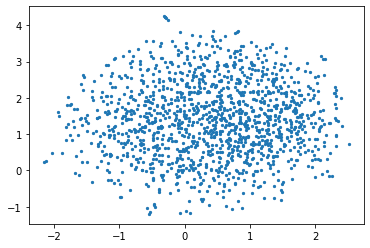

In [20]:
plt.scatter(umap_df[:, 0], umap_df[:, 1], cmap='Spectral', s=5)

In [21]:
# Using the LDA algorithm we reduce the dimensions and thus facilitate our analysis
lda = LDA().fit(final)
lda_df = lda.transform(final)

We realize that the best number of clusters is five.

In [22]:
kmean_lda5 = KMeans(n_clusters = 5).fit(lda_df)

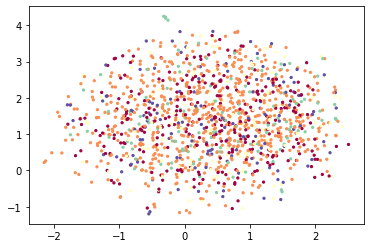

In [23]:
plt.scatter(umap_df[:, 0], umap_df[:, 1], c=kmean_lda5.labels_ , cmap='Spectral', s=5)

In [24]:
final_clust_lda5 = final.copy()

In [25]:
final_clust_lda5['cluster_lda'] = kmean_lda5.labels_

In [29]:
by_clust5 = final_clust_lda5.groupby('cluster_lda').sum().T

In [30]:
# See how many songs are in the different clusters
final_clust_lda5['cluster_lda'].value_counts()

1    700
0    298
2    131
4    131
3    124
Name: cluster_lda, dtype: int64

In [31]:
for i in range(5):
    print(by_clust5.loc[:,i].sort_values(ascending = False)[:15])

demasiado    2.648929
extraño      2.259808
mueve        2.219332
linda        2.176753
muera        2.173114
papi         2.170858
nenar        2.095081
gastar       2.077046
cuánto       2.001514
solamente    1.968143
cause        1.916572
quedo        1.914723
presente     1.905699
cuento       1.871865
diferente    1.865557
Name: 0, dtype: float64
show       3.444473
razón      3.304087
manera     3.226082
disco      3.193987
traer      3.159196
club       3.150347
suerte     3.140167
veneno     3.139740
primo      3.134988
niña       3.125536
fumo       3.125175
quemar     3.119687
brillar    3.063241
último     3.053230
ciudad     3.048440
Name: 1, dtype: float64
zigzag       1.439820
volveré      1.361482
quiera       1.253980
quise        1.232164
sitio        1.122172
prefier      1.044793
daño         1.026814
poquito      0.991122
guardar      0.969844
preguntar    0.967362
allá         0.960515
tote         0.928018
relajo       0.926463
existir      0.902889
duele        0

In [32]:
df['cluster'] = kmean_lda5.labels_

Create a wordcloud for each cluster

In [33]:
from wordcloud import WordCloud


len0 = len(df['español_stemmed'][df['cluster'] == 0].sum())
wc0 = WordCloud(background_color='black', max_words=len0, stopwords = stop)

len1 = len(df['español_stemmed'][df['cluster'] == 1].sum())
wc1 = WordCloud(background_color='black', max_words=len1, stopwords = stop)

len2 = len(df['español_stemmed'][df['cluster'] == 2].sum())
wc2 = WordCloud(background_color='black', max_words=len2, stopwords = stop)

len3 = len(df['español_stemmed'][df['cluster'] == 3].sum())
wc3 = WordCloud(background_color='black', max_words=len3, stopwords = stop)

len4 = len(df['español_stemmed'][df['cluster'] == 4].sum())
wc4 = WordCloud(background_color='black', max_words=len4, stopwords = stop)

In [34]:
wc0.generate(df['español_stemmed'][df['cluster'] == 0].sum())
wc1.generate(df['español_stemmed'][df['cluster'] == 1].sum())
wc2.generate(df['español_stemmed'][df['cluster'] == 2].sum())
wc3.generate(df['español_stemmed'][df['cluster'] == 3].sum())
wc4.generate(df['español_stemmed'][df['cluster'] == 4].sum())

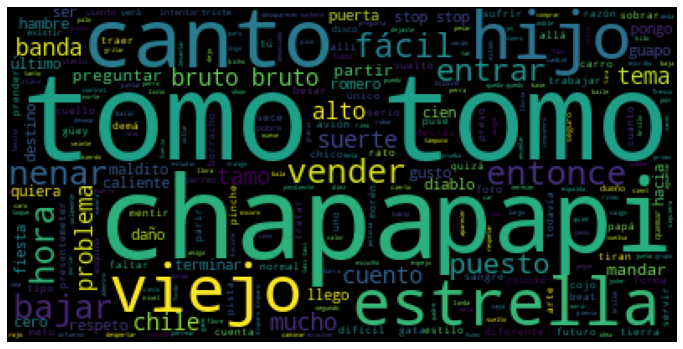

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wc0)
ax.axis('off')
plt.show()

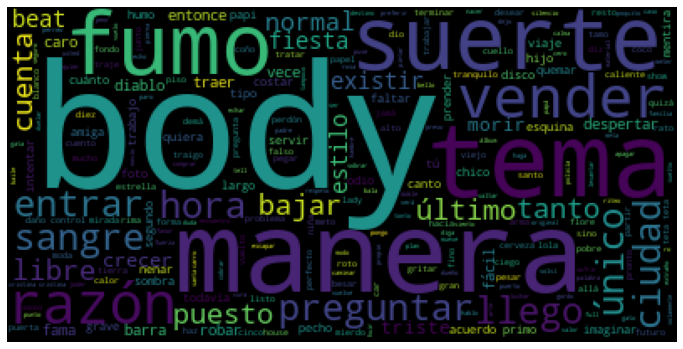

In [36]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wc1)
ax.axis('off')
plt.show()

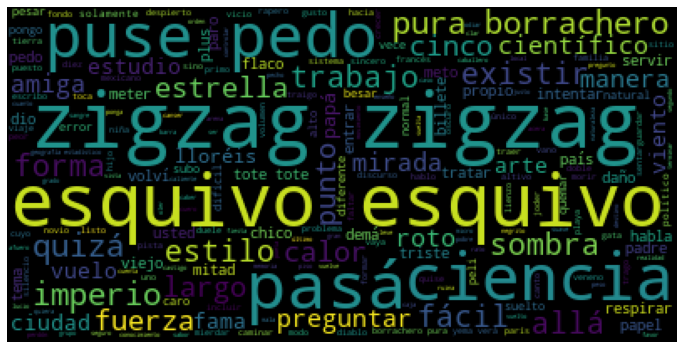

In [37]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wc2)
ax.axis('off')
plt.show()

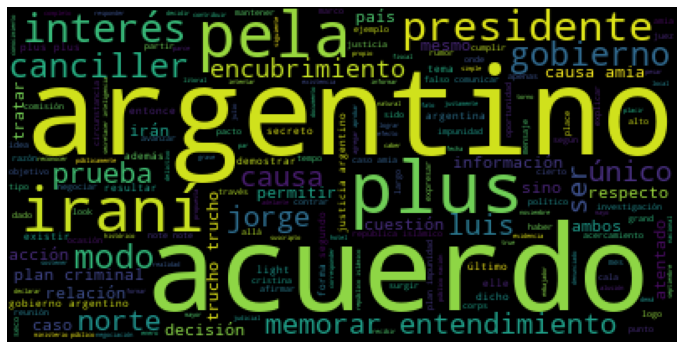

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wc3)
ax.axis('off')
plt.show()

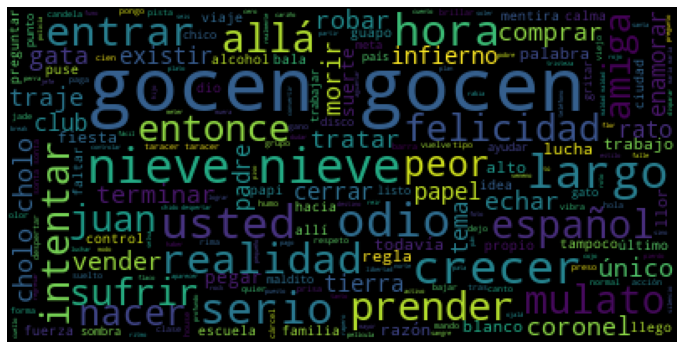

In [39]:
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(wc4)
ax.axis('off')
plt.show()

Conclusions:

La comunidad escogida (Rap/Musica Urbana), habla de temas similares, por una parte podemos distinguir el tema de drogas,fiesta,calle,chulear... lo podriamos definir como
Rap de calle. Por otro lado tambien podemos distinguir la tematica de amor, nostalgia, filosofia... Por tanto nos resulta dificil diferenciar solo por palabras. El siguiente paso seria cambiar la metodologia, por ejemplo probar algun tipo de algoritmo que utilice Word2Vec, el cual tiene en cuenta el contexto en el que se encuntra dicha palabra.

-El cluster 0 nos agrupa la mayoria de canciones. lo podriamos denominar el grupo mainstrem, es dificil proponer una tematica general, por tanto diremos que estas canciones no destacan en cuanto a vocabulario en comparacion con las demas

-El cluster 1 y 2 hablan de drogas, fumar y beber, vender, fiesta, sangre.Es el segundo cluster con mas canciones por detras del primero, estas tematicas son muy fequentes en el rap actual. Lo podriamos calificar como rap de calle. En el cual hay canciones como: *'Milion Dollar BaBy'* o 'Pikete Espacial' de Cecilio G. o el 'liricista en el tejado' de SFDK o 'combo la L' de Beny Jr

-En el 3 cluster vemos como habla de politica: presidente, gobierno, causa, encubrimiento, podriamos resumirlo en rap conciencia, como por ejemplo: 'Pandemonium' de Ayax o 'España es idiota' de Def con Dos

-El cluster 4 habla de felicidad, gozar, enamorar y odio, lo podriamos calificar como sentimentalismo, por ejemplo canciones como 'Jeremias 17-5' de Canserbero o 'Si tu kiere' de Soto Asa

In [46]:
# You can check the diferents clsuters
#df[['song_name','artist']][df['cluster'] == ]

,song_name,artist
1,Recuerdos,AMBKOR
5,Hola,AMBKOR
6,Amor Consciente,AMBKOR
7,Y Si Fuera...,AMBKOR
12,La Guía de la Alegría,Accion Sanchez
...,...,...
1373,Islandia,Zetazen
1375,Al Borde,Zetazen
1379,SUBEME LA RADIO (feat. Descemer Bueno & Zion ...,Zion
1380,MÁS DE UNA CITA,Zion
